In [2]:
import pandas as pd

df = pd.read_csv("cereal.csv")
df.head()

name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843

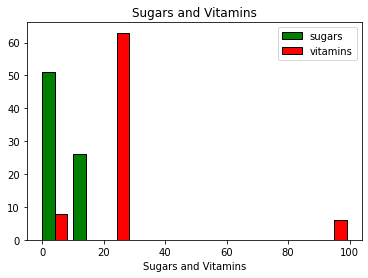

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist([df['sugars'],df['vitamins']],color=['green','red'],edgecolor='black',)
plt.title("Sugars and Vitamins")
plt.xlabel("Sugars and Vitamins")
plt.legend(['sugars','vitamins'])
plt.show()

In [4]:
dic_mfr = {'N': 'Nabisco',
           'Q': 'Quaker Oats',
           'K': 'Kelloggs',
           'R': 'Raslston Purina',
           'G': 'General Mills' ,
           'P' :'Post' ,
           'A':'American Home Foods Products'}

df["manufactures"]=[dic_mfr[mfr] for mfr in df["mfr"]]
df.head()

name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  \
0    5.0       6     280        25      3     1.0  0.33  68.402973   
1    8.0       8     135         0      3     1.0  1.00  33.983679   
2    7.0       5     320        25      3     1.0  0.33  59.425505   
3    8.0       0     330        25      3     1.0  0.50  93.704912   
4   14.0       8      -1        25      3     1.0  0.75  34.384843   

      manufactures  
0          Nabisco  
1      Quaker Oats  
2         Kelloggs  
3         Kelloggs  
4  Raslston Purina

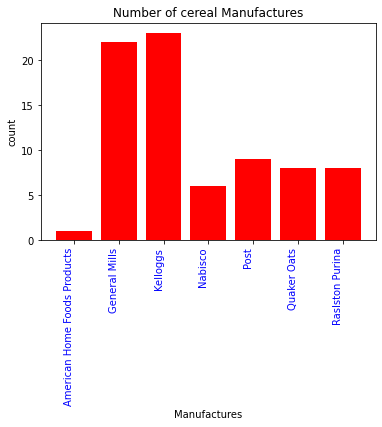

In [6]:
group_mfr = df.groupby(["manufactures"],as_index=False).count()
x=group_mfr["manufactures"]
y=group_mfr["mfr"]
plt.bar(x,y,color='red')
plt.setp(plt.gca().get_xticklabels(),rotation='vertical',horizontalalignment='right',color='blue')
plt.xlabel("Manufactures")
plt.ylabel("count")
plt.title("Number of cereal Manufactures")
plt.show()

In [96]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,3:15]
Y = df['rating']

A1,B1,C1,D1 = train_test_split(X,Y,test_size=0.25,random_state=0)
print(A1,C1)

    calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
61       110        1    0     240    0.0   23.0       2      30        25   
53       100        3    0     320    1.0   20.0       3      45       100   
62       110        2    0     290    0.0   22.0       3      35        25   
56       100        4    1     135    2.0   14.0       6     110        25   
72       110        2    1     250    0.0   21.0       3      60        25   
6        110        2    0     125    1.0   11.0      14      30        25   
52       120        3    1     200    6.0   11.0      14     260        25   
70       140        3    1     190    4.0   15.0      14     230       100   
4        110        2    2     200    1.0   14.0       8      -1        25   
30       100        2    0      45    0.0   11.0      15      40        25   
49       140        3    2     220    3.0   21.0       7     130        25   
2         70        4    1     260    9.0    7.0       5     320

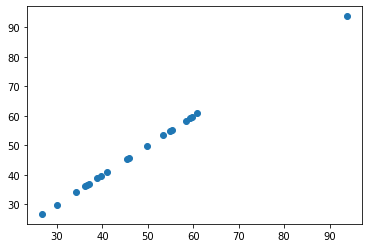

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Lin_Reg = LinearRegression()
output = Lin_Reg.fit(A1,C1)

Predict_out = output.predict(B1)
Predict_out

plt.scatter(np.array(Predict_out),np.array(D1))
plt.show()